# **Real-Time Face Emotion Recognition using Deep Learning**

This project aims to build a real-time face emotion recognition model using deep learning. The model will be trained on facial images labeled with emotions and then deployed to recognize emotions from live video feeds in real-time.


## Step 1: Importing Libraries

In this step, we will import the necessary libraries required for building the real-time face emotion recognition model. These include libraries for data handling, model building, and real-time video processing.

### Libraries:
- `numpy`, `pandas` for data manipulation
- `matplotlib`, `seaborn` for visualization
- `tensorflow`, `keras` for building and training deep learning models
- `opencv` for real-time video processing

etc


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the file path in your Google Drive
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training.zip'
extract_to = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Listing the files in the directory
os.listdir(extract_to)


['haarcascade_frontalface_default.xml',
 'training.zip',
 'Face Emotion Recognization.ipynb',
 'training']

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
train_data='/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training'

In [ ]:
img_array = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training/neutral/PrivateTest_10086748.jpg')

In [ ]:
img_array.shape

(48, 48, 3)

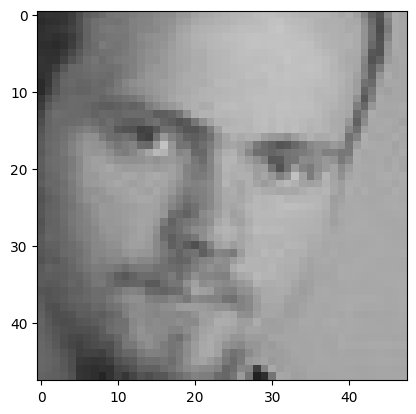

In [ ]:
plt.imshow(img_array)

Load the complete dataset

In [ ]:
Classes=['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

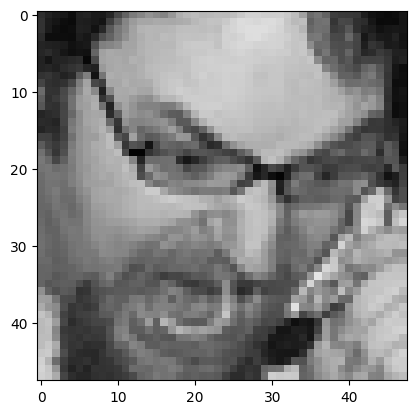

In [ ]:
for category in Classes:
  path=os.path.join(train_data,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path, img))

    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

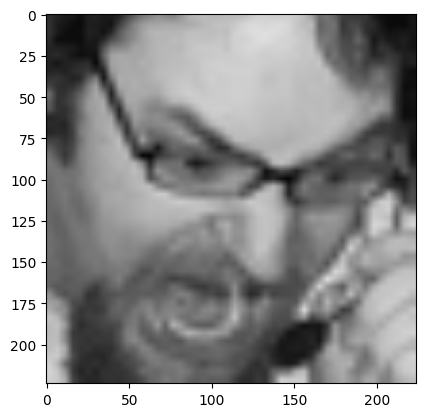

In [ ]:
# Resize the image
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))  # Make img_size a tuple (width, height)
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
new_array.shape

(224, 224, 3)

#### Read all the image and convert them into an array

In [ ]:
import os
import cv2

training_data = []

def create_training_data():
    count = 0  # Counter for progress tracking
    failed_images = []  # List to track failed images
    skipped_folders = []  # List to track skipped folders

    # Verify that the train_data directory exists
    if not os.path.exists(train_data):
        print(f"Training data path not found: {train_data}")
        return

    # Traverse the directory tree using os.walk for a robust search
    for category in Classes:
        path = os.path.join(train_data, category)

        # Use absolute paths for robustness
        path = os.path.abspath(path)

        # Check if folder exists and is accessible
        if not os.path.exists(path):
            print(f"Folder not found, skipping category: {category}, Path: {path}")
            skipped_folders.append(path)
            continue
        if not os.access(path, os.R_OK):
            print(f"Cannot access folder: {category}, Path: {path}")
            skipped_folders.append(path)
            continue

        Class_num = Classes.index(category)  # 0, 1, etc. as class labels
        print(f"Processing category: {category}, Path: {path}")

        for root, dirs, files in os.walk(path):
            if not files:  # Check if the folder contains files
                print(f"No images found in folder: {root}")
                skipped_folders.append(root)
                continue

            for img in files:
                try:
                    img_path = os.path.join(root, img)

                    # Check for valid image extensions
                    if not img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                        print(f"Skipping non-image file: {img_path}")
                        continue

                    img_array = cv2.imread(img_path)

                    # Ensure the image was read correctly
                    if img_array is None:
                        print(f"Failed to read image: {img_path}")
                        failed_images.append(img_path)
                        continue

                    # Resize and append to training data
                    new_array = cv2.resize(img_array, (img_size, img_size))
                    training_data.append([new_array, Class_num])
                    count += 1

                    if count % 100 == 0:
                        print(f"Processed {count} images")

                except Exception as e:
                    print(f"Error processing image {img_path}: {e}")
                    failed_images.append(img_path)

    # Final summary
    print(f"\nTotal images processed: {count}")
    if skipped_folders:
        print(f"\nSkipped folders ({len(skipped_folders)}):")
        for folder in skipped_folders:
            print(folder)

    if failed_images:
        print(f"\nFailed to process {len(failed_images)} images:")
        for fail in failed_images:
            print(fail)

# Run the function
create_training_data()

# Verify the length of training_data
print(f"Number of images in training_data: {len(training_data)}")


Processing category: angry, Path: /content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training/angry
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processing category: disgust, Path: /content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training/disgust
Processed 1000 images
Processing category: fear, Path: /content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training/fear
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images
Processing category: happy, Path: /content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/training/happy
Processed 2100 images
Processed 2200 images
Processed 2300 images
Processed 2400 images
Processed 2500 imag

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
# Initialize lists to hold features and labels
X = []  # List to store image data (features)
Y = []  # List to store labels

# Loop through the training data to separate features and labels
for features, label in training_data:
    X.append(features)  # Append the image data to the features list
    Y.append(label)     # Append the corresponding label to the labels list

# Convert the list of image data to a NumPy array and reshape it
# -1 in reshape allows NumPy to infer the correct size for that dimension
# img_size is the height and width of each image (224x224 in this case)
# 3 represents the number of color channels (RGB)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

(7178, 224, 224, 3)

### Normalize the data

In [ ]:
X= X/255.0

In [ ]:
Y=np.array(Y)

In [ ]:
Y.shape

(7178,)

In [ ]:
Y[0]

2

## Deep Learning model for training: Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

## Transfer Learning -Tuning , weights will start from the last check point

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output=layers.Dense(128)(base_output) # adding new layers, after the output of the global pooling layer
final_output=layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(64)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7, activation='softmax')(final_output) ## clasffication layer

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
new_model=keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.fit(X, Y, epochs=15,batch_size=32)
new_model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/mymodel.keras')

Epoch 1/15
225/225 [==============================] - 181s 805ms/step - loss: 1.1149 - accuracy: 0.5832
Epoch 2/15
225/225 [==============================] - 176s 781ms/step - loss: 1.0188 - accuracy: 0.6198
Epoch 3/15
225/225 [==============================] - 179s 796ms/step - loss: 0.9499 - accuracy: 0.6452
Epoch 4/15
225/225 [==============================] - 182s 809ms/step - loss: 0.8609 - accuracy: 0.6794
Epoch 5/15
225/225 [==============================] - 179s 796ms/step - loss: 0.8020 - accuracy: 0.7045
Epoch 6/15
225/225 [==============================] - 179s 797ms/step - loss: 0.7235 - accuracy: 0.7300
Epoch 7/15
225/225 [==============================] - 180s 799ms/step - loss: 0.6532 - accuracy: 0.7593
Epoch 8/15
225/225 [==============================] - 176s 782ms/step - loss: 0.5789 - accuracy: 0.7909
Epoch 9/15
225/225 [==============================] - 176s 784ms/step - loss: 0.5146 - accuracy: 0.8103
Epoch 10/15
225/225 [==============================] - 177s 787m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/mymodel.keras')

In [ ]:
import tensorflow as tf

# Load the model saved in .keras format
model = new_model

# Save the model in HDF5 format (.h5)
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/mymodel.pb')

print("Model saved in .h5 format successfully.")


Model saved in .h5 format successfully.


In [ ]:
frame=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/download.jpeg')

In [ ]:
frame.shape

(190, 266, 3)

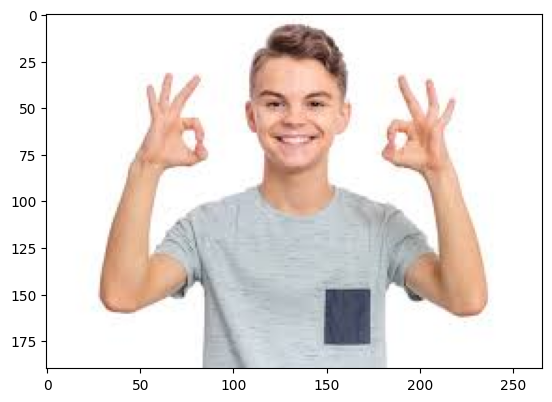

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/Colab Notebooks/Deep Learning/Projects/FER/haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

In [ ]:
gray.shape

(190, 266)

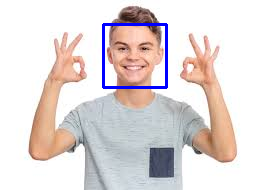

In [ ]:
from google.colab.patches import cv2_imshow

faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Loop over detected faces
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    # Draw rectangle around the face
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Detect faces within the region of interest
    faces_in_roi = faceCascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=4)

    if len(faces_in_roi) == 0:
        print('Face not detected within ROI')
    else:
        for (ex, ey, ew, eh) in faces_in_roi:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]
            # You can process face_roi here if needed

# Display the resulting frame
cv2_imshow(frame)  # Use cv2_imshow() instead of cv2.imshow()


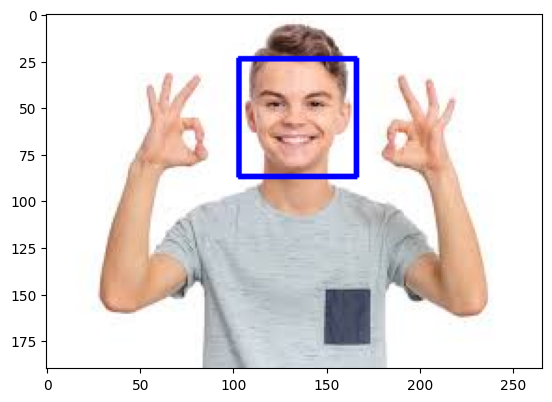

In [ ]:
import matplotlib.pyplot as plt

# Convert color format from BGR (OpenCV default) to RGB for proper display with matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Corrected 'cv2.cvtColor'
plt.show()


In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0  # Proper normalization

In [ ]:
prediction=new_model.predict(final_image)

1/1 [==============================] - 0s 45ms/step


In [ ]:
prediction[0]

array([5.9330352e-03, 1.4323070e-04, 1.5366170e-01, 7.6407784e-01,
       2.8132477e-03, 3.9164527e-04, 7.2979249e-02], dtype=float32)

In [ ]:
np.argmax(prediction)

3

Category 3 represents Happy